In [1]:
import numpy as np
import xarray as xr
import os
import glob
from pathlib import Path 
import pathlib
from pprint import pprint
import matplotlib.pyplot as plt
import time
import requests
import s3fs
from os.path import dirname, join
import datetime
import myDate
import netCDF4
from scipy.interpolate import griddata

import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
grids_file_dir = Path('/home/jovyan/Data/ECCO_GMSL/')
main_dir = Path('/home/jovyan/ECCO_GMSL/')
gmsl_file_dir = Path('/home/jovyan/Data/ECCO_GMSL/GMSL/')

# Open different types of grids

In [3]:
grids_files_3x1_no66sel_coslat = list(grids_file_dir.glob('gridding_3x1_output_3errors_2cm_no66sel_coslat/*SSHA_gridded_3x1_*nc'))
grids_files_3x1_no66sel_coslat=np.sort(grids_files_3x1_no66sel_coslat)
print(grids_files_3x1_no66sel_coslat[0:5])
print('...')
print(grids_files_3x1_no66sel_coslat[-5:])

[PosixPath('/home/jovyan/Data/ECCO_GMSL/gridding_3x1_output_3errors_2cm_no66sel_coslat/SSHA_gridded_3x1_1992-09-27.nc')
 PosixPath('/home/jovyan/Data/ECCO_GMSL/gridding_3x1_output_3errors_2cm_no66sel_coslat/SSHA_gridded_3x1_1992-10-07.nc')
 PosixPath('/home/jovyan/Data/ECCO_GMSL/gridding_3x1_output_3errors_2cm_no66sel_coslat/SSHA_gridded_3x1_1992-10-17.nc')
 PosixPath('/home/jovyan/Data/ECCO_GMSL/gridding_3x1_output_3errors_2cm_no66sel_coslat/SSHA_gridded_3x1_1992-10-27.nc')
 PosixPath('/home/jovyan/Data/ECCO_GMSL/gridding_3x1_output_3errors_2cm_no66sel_coslat/SSHA_gridded_3x1_1992-11-06.nc')]
...
[PosixPath('/home/jovyan/Data/ECCO_GMSL/gridding_3x1_output_3errors_2cm_no66sel_coslat/SSHA_gridded_3x1_2017-11-25.nc')
 PosixPath('/home/jovyan/Data/ECCO_GMSL/gridding_3x1_output_3errors_2cm_no66sel_coslat/SSHA_gridded_3x1_2017-12-05.nc')
 PosixPath('/home/jovyan/Data/ECCO_GMSL/gridding_3x1_output_3errors_2cm_no66sel_coslat/SSHA_gridded_3x1_2017-12-15.nc')
 PosixPath('/home/jovyan/Data/ECCO_

In [4]:
grids_3x1_no66sel_coslat = xr.open_mfdataset(
        paths=grids_files_3x1_no66sel_coslat,
        combine='nested',
        concat_dim='time',
        decode_cf=True,
        compat='override',
        coords='minimal',
        chunks={'time': 1}  
    )   
grids_3x1_no66sel_coslat

<xarray.Dataset>
Dimensions:  (lon: 120, lat: 180, time: 924)
Coordinates:
  * lon      (lon) int64 -180 -177 -174 -171 -168 -165 ... 165 168 171 174 177
  * lat      (lat) int64 -90 -89 -88 -87 -86 -85 -84 ... 83 84 85 86 87 88 89
  * time     (time) datetime64[ns] 1992-09-27 1992-10-07 ... 2018-01-04
Data variables:
    SSHA     (time, lat, lon) float64 dask.array<chunksize=(1, 180, 120), meta=np.ndarray>

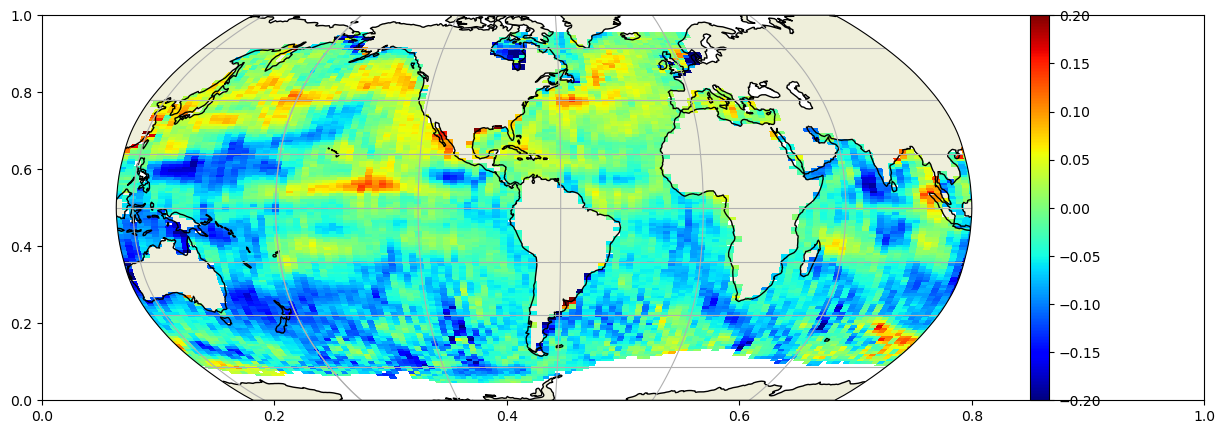

In [5]:
fig = plt.figure(figsize=(15,5))
cm = plt.get_cmap('gist_rainbow')
ax=fig.gca()

ax = plt.axes(projection=ccrs.Robinson(central_longitude=-67, globe=None))
ax.gridlines()
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)

p=ax.pcolor(grids_3x1_no66sel_coslat.lon,grids_3x1_no66sel_coslat.lat,grids_3x1_no66sel_coslat.SSHA[1,:,:].squeeze(),transform=ccrs.PlateCarree(),vmin=-0.2,vmax=0.2, cmap='jet')
h=plt.colorbar(p)

In [6]:
grids_file_3x1_no66sel_weight = list(grids_file_dir.glob('gridding_3x1_output_3errors_2cm_no66sel_weight/*SSHA_gridded_3x1_*nc'))
grids_file_3x1_no66sel_weight=np.sort(grids_file_3x1_no66sel_weight)
print(grids_file_3x1_no66sel_weight[0:5])
print('...')
print(grids_file_3x1_no66sel_weight[-5:])

[PosixPath('/home/jovyan/Data/ECCO_GMSL/gridding_3x1_output_3errors_2cm_no66sel_weight/SSHA_gridded_3x1_1992-09-27.nc')
 PosixPath('/home/jovyan/Data/ECCO_GMSL/gridding_3x1_output_3errors_2cm_no66sel_weight/SSHA_gridded_3x1_1992-10-07.nc')
 PosixPath('/home/jovyan/Data/ECCO_GMSL/gridding_3x1_output_3errors_2cm_no66sel_weight/SSHA_gridded_3x1_1992-10-17.nc')
 PosixPath('/home/jovyan/Data/ECCO_GMSL/gridding_3x1_output_3errors_2cm_no66sel_weight/SSHA_gridded_3x1_1992-10-27.nc')
 PosixPath('/home/jovyan/Data/ECCO_GMSL/gridding_3x1_output_3errors_2cm_no66sel_weight/SSHA_gridded_3x1_1992-11-06.nc')]
...
[PosixPath('/home/jovyan/Data/ECCO_GMSL/gridding_3x1_output_3errors_2cm_no66sel_weight/SSHA_gridded_3x1_2017-11-25.nc')
 PosixPath('/home/jovyan/Data/ECCO_GMSL/gridding_3x1_output_3errors_2cm_no66sel_weight/SSHA_gridded_3x1_2017-12-05.nc')
 PosixPath('/home/jovyan/Data/ECCO_GMSL/gridding_3x1_output_3errors_2cm_no66sel_weight/SSHA_gridded_3x1_2017-12-15.nc')
 PosixPath('/home/jovyan/Data/ECCO_

In [7]:
grids_3x1_no66sel_weight = xr.open_mfdataset(
        paths=grids_file_3x1_no66sel_weight,
        combine='nested',
        concat_dim='time',
        decode_cf=True,
        compat='override',
        coords='minimal',
        chunks={'time': 1}  
    )   
grids_3x1_no66sel_weight

<xarray.Dataset>
Dimensions:  (lon: 120, lat: 180, time: 924)
Coordinates:
  * lon      (lon) int64 -180 -177 -174 -171 -168 -165 ... 165 168 171 174 177
  * lat      (lat) int64 -90 -89 -88 -87 -86 -85 -84 ... 83 84 85 86 87 88 89
  * time     (time) datetime64[ns] 1992-09-27 1992-10-07 ... 2018-01-04
Data variables:
    SSHA     (time, lat, lon) float64 dask.array<chunksize=(1, 180, 120), meta=np.ndarray>

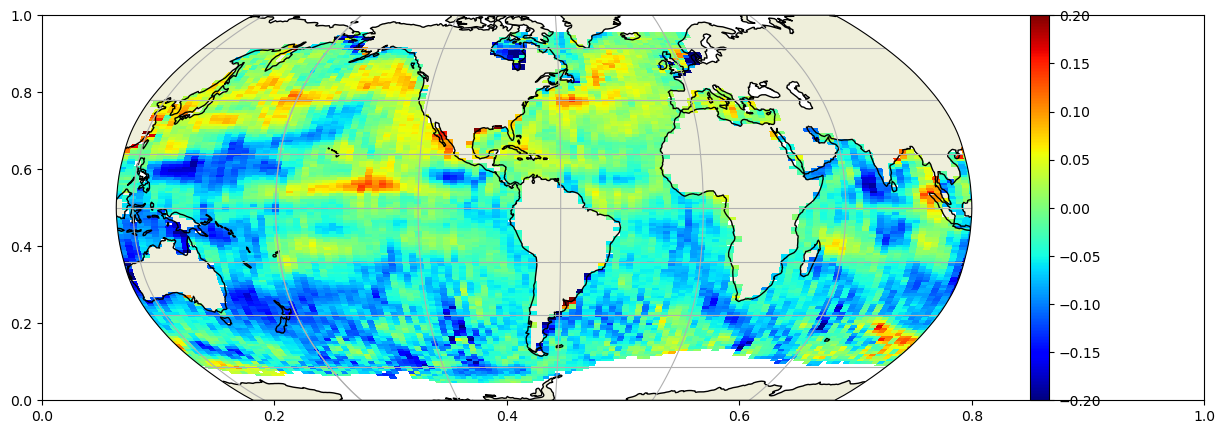

In [8]:
fig = plt.figure(figsize=(15,5))
cm = plt.get_cmap('gist_rainbow')
ax=fig.gca()

ax = plt.axes(projection=ccrs.Robinson(central_longitude=-67, globe=None))
ax.gridlines()
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)

p=ax.pcolor(grids_3x1_no66sel_coslat.lon,grids_3x1_no66sel_coslat.lat,grids_3x1_no66sel_weight.SSHA[1,:,:].squeeze(),transform=ccrs.PlateCarree(),vmin=-0.2,vmax=0.2, cmap='jet')
h=plt.colorbar(p)

In [9]:
grids_files_3x1_66sel_coslat = list(grids_file_dir.glob('gridding_3x1_output_3errors_2cm_66sel_coslat/*SSHA_gridded_3x1_*nc'))
grids_files_3x1_66sel_coslat=np.sort(grids_files_3x1_66sel_coslat)
print(grids_files_3x1_66sel_coslat[0:5])
print('...')
print(grids_files_3x1_66sel_coslat[-5:])

[PosixPath('/home/jovyan/Data/ECCO_GMSL/gridding_3x1_output_3errors_2cm_66sel_coslat/SSHA_gridded_3x1_1992-09-27.nc')
 PosixPath('/home/jovyan/Data/ECCO_GMSL/gridding_3x1_output_3errors_2cm_66sel_coslat/SSHA_gridded_3x1_1992-10-07.nc')
 PosixPath('/home/jovyan/Data/ECCO_GMSL/gridding_3x1_output_3errors_2cm_66sel_coslat/SSHA_gridded_3x1_1992-10-17.nc')
 PosixPath('/home/jovyan/Data/ECCO_GMSL/gridding_3x1_output_3errors_2cm_66sel_coslat/SSHA_gridded_3x1_1992-10-27.nc')
 PosixPath('/home/jovyan/Data/ECCO_GMSL/gridding_3x1_output_3errors_2cm_66sel_coslat/SSHA_gridded_3x1_1992-11-06.nc')]
...
[PosixPath('/home/jovyan/Data/ECCO_GMSL/gridding_3x1_output_3errors_2cm_66sel_coslat/SSHA_gridded_3x1_2017-11-25.nc')
 PosixPath('/home/jovyan/Data/ECCO_GMSL/gridding_3x1_output_3errors_2cm_66sel_coslat/SSHA_gridded_3x1_2017-12-05.nc')
 PosixPath('/home/jovyan/Data/ECCO_GMSL/gridding_3x1_output_3errors_2cm_66sel_coslat/SSHA_gridded_3x1_2017-12-15.nc')
 PosixPath('/home/jovyan/Data/ECCO_GMSL/gridding_3x

In [10]:
grids_3x1_66sel_coslat = xr.open_mfdataset(
        paths=grids_files_3x1_66sel_coslat,
        combine='nested',
        concat_dim='time',
        decode_cf=True,
        compat='override',
        coords='minimal',
        chunks={'time': 1}  
    )   
grids_3x1_66sel_coslat

<xarray.Dataset>
Dimensions:  (lon: 120, lat: 180, time: 924)
Coordinates:
  * lon      (lon) int64 -180 -177 -174 -171 -168 -165 ... 165 168 171 174 177
  * lat      (lat) int64 -90 -89 -88 -87 -86 -85 -84 ... 83 84 85 86 87 88 89
  * time     (time) datetime64[ns] 1992-09-27 1992-10-07 ... 2018-01-04
Data variables:
    SSHA     (time, lat, lon) float64 dask.array<chunksize=(1, 180, 120), meta=np.ndarray>

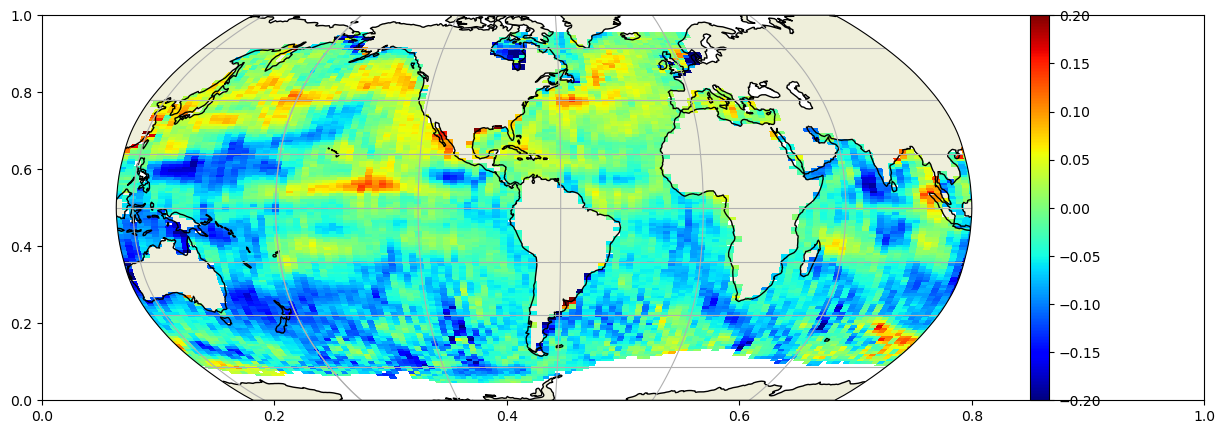

In [11]:
fig = plt.figure(figsize=(15,5))
cm = plt.get_cmap('gist_rainbow')
ax=fig.gca()

ax = plt.axes(projection=ccrs.Robinson(central_longitude=-67, globe=None))
ax.gridlines()
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)

p=ax.pcolor(grids_3x1_no66sel_coslat.lon,grids_3x1_no66sel_coslat.lat,grids_3x1_66sel_coslat.SSHA[1,:,:].squeeze(),transform=ccrs.PlateCarree(),vmin=-0.2,vmax=0.2, cmap='jet')
h=plt.colorbar(p)

In [12]:
grids_files_3x1_66sel_weight = list(grids_file_dir.glob('gridding_3x1_output_3errors_2cm_66sel_weight/*SSHA_gridded_3x1_*nc'))
grids_files_3x1_66sel_weight=np.sort(grids_files_3x1_66sel_weight)
print(grids_files_3x1_66sel_weight[0:5])
print('...')
print(grids_files_3x1_66sel_weight[-5:])

[PosixPath('/home/jovyan/Data/ECCO_GMSL/gridding_3x1_output_3errors_2cm_66sel_weight/SSHA_gridded_3x1_1992-09-27.nc')
 PosixPath('/home/jovyan/Data/ECCO_GMSL/gridding_3x1_output_3errors_2cm_66sel_weight/SSHA_gridded_3x1_1992-10-07.nc')
 PosixPath('/home/jovyan/Data/ECCO_GMSL/gridding_3x1_output_3errors_2cm_66sel_weight/SSHA_gridded_3x1_1992-10-17.nc')
 PosixPath('/home/jovyan/Data/ECCO_GMSL/gridding_3x1_output_3errors_2cm_66sel_weight/SSHA_gridded_3x1_1992-10-27.nc')
 PosixPath('/home/jovyan/Data/ECCO_GMSL/gridding_3x1_output_3errors_2cm_66sel_weight/SSHA_gridded_3x1_1992-11-06.nc')]
...
[PosixPath('/home/jovyan/Data/ECCO_GMSL/gridding_3x1_output_3errors_2cm_66sel_weight/SSHA_gridded_3x1_2017-11-25.nc')
 PosixPath('/home/jovyan/Data/ECCO_GMSL/gridding_3x1_output_3errors_2cm_66sel_weight/SSHA_gridded_3x1_2017-12-05.nc')
 PosixPath('/home/jovyan/Data/ECCO_GMSL/gridding_3x1_output_3errors_2cm_66sel_weight/SSHA_gridded_3x1_2017-12-15.nc')
 PosixPath('/home/jovyan/Data/ECCO_GMSL/gridding_3x

In [13]:
grids_3x1_66sel_weight = xr.open_mfdataset(
        paths=grids_files_3x1_66sel_weight,
        combine='nested',
        concat_dim='time',
        decode_cf=True,
        compat='override',
        coords='minimal',
        chunks={'time': 1}  
    )   
grids_3x1_66sel_weight

<xarray.Dataset>
Dimensions:  (lon: 120, lat: 180, time: 924)
Coordinates:
  * lon      (lon) int64 -180 -177 -174 -171 -168 -165 ... 165 168 171 174 177
  * lat      (lat) int64 -90 -89 -88 -87 -86 -85 -84 ... 83 84 85 86 87 88 89
  * time     (time) datetime64[ns] 1992-09-27 1992-10-07 ... 2018-01-04
Data variables:
    SSHA     (time, lat, lon) float64 dask.array<chunksize=(1, 180, 120), meta=np.ndarray>

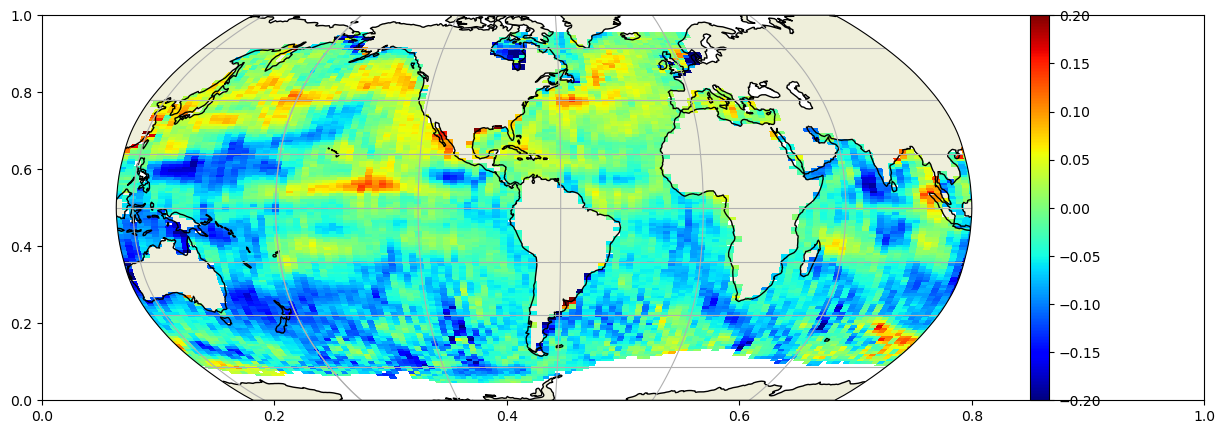

In [14]:
fig = plt.figure(figsize=(15,5))
cm = plt.get_cmap('gist_rainbow')
ax=fig.gca()

ax = plt.axes(projection=ccrs.Robinson(central_longitude=-67, globe=None))
ax.gridlines()
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)

p=ax.pcolor(grids_3x1_no66sel_coslat.lon,grids_3x1_no66sel_coslat.lat,grids_3x1_66sel_weight.SSHA[1,:,:].squeeze(),transform=ccrs.PlateCarree(),vmin=-0.2,vmax=0.2, cmap='jet')
h=plt.colorbar(p)

In [15]:
grids_files = list(grids_file_dir.glob('gridding_output_3errors_2cm/*SSHA_gridded_*nc'))
grids_files=np.sort(grids_files)
print(grids_files[0:5])
print('...')
print(grids_files[-5:])

[PosixPath('/home/jovyan/Data/ECCO_GMSL/gridding_output_3errors_2cm/SSHA_gridded_1992-09-27.nc')
 PosixPath('/home/jovyan/Data/ECCO_GMSL/gridding_output_3errors_2cm/SSHA_gridded_1992-10-07.nc')
 PosixPath('/home/jovyan/Data/ECCO_GMSL/gridding_output_3errors_2cm/SSHA_gridded_1992-10-17.nc')
 PosixPath('/home/jovyan/Data/ECCO_GMSL/gridding_output_3errors_2cm/SSHA_gridded_1992-10-27.nc')
 PosixPath('/home/jovyan/Data/ECCO_GMSL/gridding_output_3errors_2cm/SSHA_gridded_1992-11-06.nc')]
...
[PosixPath('/home/jovyan/Data/ECCO_GMSL/gridding_output_3errors_2cm/SSHA_gridded_2017-11-25.nc')
 PosixPath('/home/jovyan/Data/ECCO_GMSL/gridding_output_3errors_2cm/SSHA_gridded_2017-12-05.nc')
 PosixPath('/home/jovyan/Data/ECCO_GMSL/gridding_output_3errors_2cm/SSHA_gridded_2017-12-15.nc')
 PosixPath('/home/jovyan/Data/ECCO_GMSL/gridding_output_3errors_2cm/SSHA_gridded_2017-12-25.nc')
 PosixPath('/home/jovyan/Data/ECCO_GMSL/gridding_output_3errors_2cm/SSHA_gridded_2018-01-04.nc')]


In [16]:
grids = xr.open_mfdataset(
        paths=grids_files,
        combine='nested',
        concat_dim='time',
        decode_cf=True,
        compat='override',
        coords='minimal',
        chunks={'time': 1}  
    )   
grids

<xarray.Dataset>
Dimensions:    (longitude: 720, latitude: 360, time: 923)
Coordinates:
  * longitude  (longitude) float32 -179.8 -179.2 -178.8 ... 178.8 179.2 179.8
  * latitude   (latitude) float32 -89.75 -89.25 -88.75 ... 88.75 89.25 89.75
  * time       (time) datetime64[ns] 1992-09-27 1992-10-07 ... 2018-01-04
Data variables:
    SSHA       (time, latitude, longitude) float32 dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    counts     (time, latitude, longitude) float32 dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    mask       (time, latitude, longitude) float32 dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
Attributes:
    gridding_method:  Gridded using pyresample resample_gauss with roi=600000...

In [17]:
[LO,LA]=np.meshgrid(grids.longitude,grids.latitude)
[LOgrid,LAgrid]=np.meshgrid(grids_3x1_no66sel_coslat.lon,grids_3x1_no66sel_coslat.lat)
LOgrid = np.reshape(LOgrid,np.prod(LOgrid.shape))
LAgrid = np.reshape(LAgrid,np.prod(LAgrid.shape))
LO = np.reshape(LO,np.prod(LO.shape))
LA = np.reshape(LA,np.prod(LA.shape))
grids_regrid=[]
for i in range(0,grids.SSHA.shape[0]):
    data = np.reshape(grids.SSHA[i,:,:].values,np.prod(grids.SSHA[i,:,:].shape))
    grids_regrid_tmp = griddata((LO,LA), data, (LOgrid, LAgrid), method='nearest')
    grids_regrid_tmp = np.reshape(grids_regrid_tmp,(1,len(grids_3x1_no66sel_coslat.lat),len(grids_3x1_no66sel_coslat.lon)))
    try:
        grids_regrid=np.vstack((grids_regrid,grids_regrid_tmp))
    except:
        grids_regrid=grids_regrid_tmp

In [18]:
grids_regrid = xr.DataArray(grids_regrid, dims=['time','lat','lon'])
grids_regrid = grids_regrid.assign_coords({'lon':grids_3x1_no66sel_coslat.lon,'lat':grids_3x1_no66sel_coslat.lat})
grids_regrid.name = 'SSHA'
grids_regrid.attrs['units'] = 'm'
grids_regrid['time']=grids.time
grids_regrid

<xarray.DataArray 'SSHA' (time: 923, lat: 180, lon: 120)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * lon      (lon) int64 -180 -177 -174 -171 -168 -165 ... 165 168 171 174 177
  * lat      (lat) int64 -90 -89 -88 -87 -86 -85 -84 ... 83 84 85 86 87 88 89
  * time     (time) datetime64[ns] 1992-09-27 1992-10-07 ... 2018-01-04
Attributes:
    units:    m

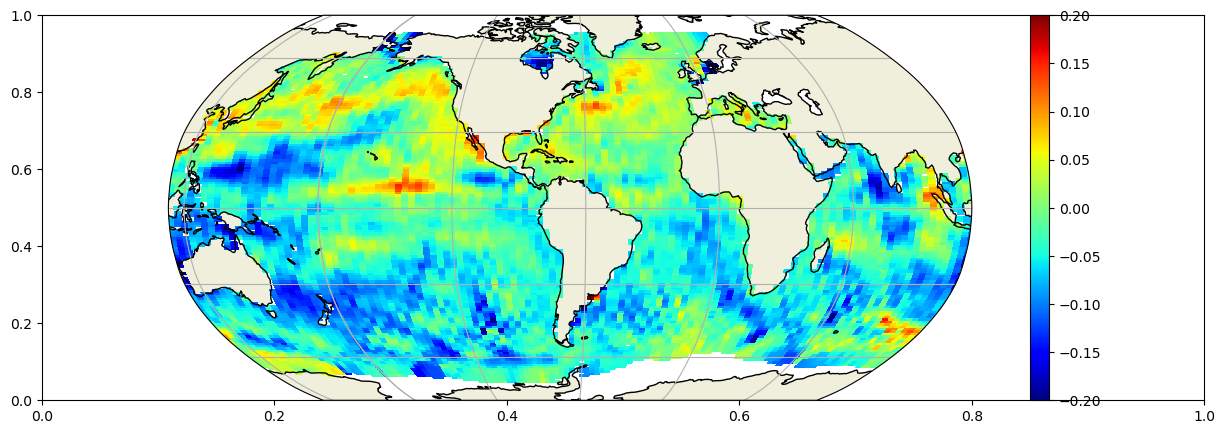

In [19]:
fig = plt.figure(figsize=(15,5))
cm = plt.get_cmap('gist_rainbow')
ax=fig.gca()

ax = plt.axes(projection=ccrs.Robinson(central_longitude=-67, globe=None))
ax.gridlines()
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)

p=ax.pcolor(grids_3x1_no66sel_coslat.lon,grids_3x1_no66sel_coslat.lat,grids_regrid[1,:,:].squeeze(),transform=ccrs.PlateCarree(),vmin=-0.2,vmax=0.2, cmap='jet')
h=plt.colorbar(p)

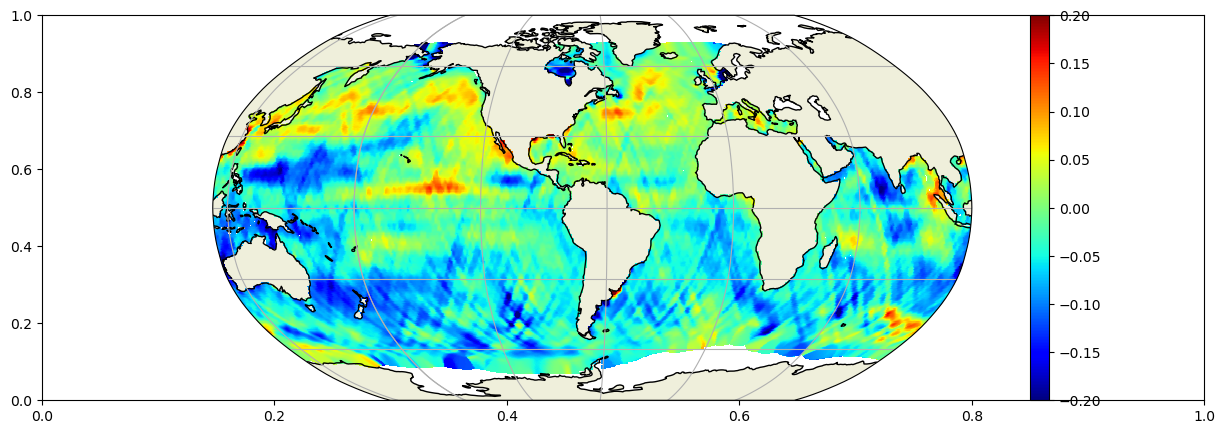

In [20]:
fig = plt.figure(figsize=(15,5))
cm = plt.get_cmap('gist_rainbow')
ax=fig.gca()

ax = plt.axes(projection=ccrs.Robinson(central_longitude=-67, globe=None))
ax.gridlines()
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)

p=ax.pcolor(grids.longitude,grids.latitude,grids.SSHA[1,:,:].squeeze(),transform=ccrs.PlateCarree(),vmin=-0.2,vmax=0.2, cmap='jet')
h=plt.colorbar(p)

# Differences Maps for weights and sel 66, show spatial impacts of each change

In [21]:
diff_nosel66_weights=(grids_3x1_no66sel_coslat.SSHA-grids_3x1_no66sel_weight.SSHA)*100 #cm
diff_sel66_weights=(grids_3x1_66sel_coslat.SSHA-grids_3x1_66sel_weight.SSHA)*100 #cm
diff_weights_sel66=(grids_3x1_no66sel_weight.SSHA-grids_3x1_66sel_weight.SSHA)*100 #cm
diff_coslat_sel66=(grids_3x1_no66sel_coslat.SSHA-grids_3x1_66sel_coslat.SSHA)*100 #cm

ValueError: too many values to unpack (expected 2)

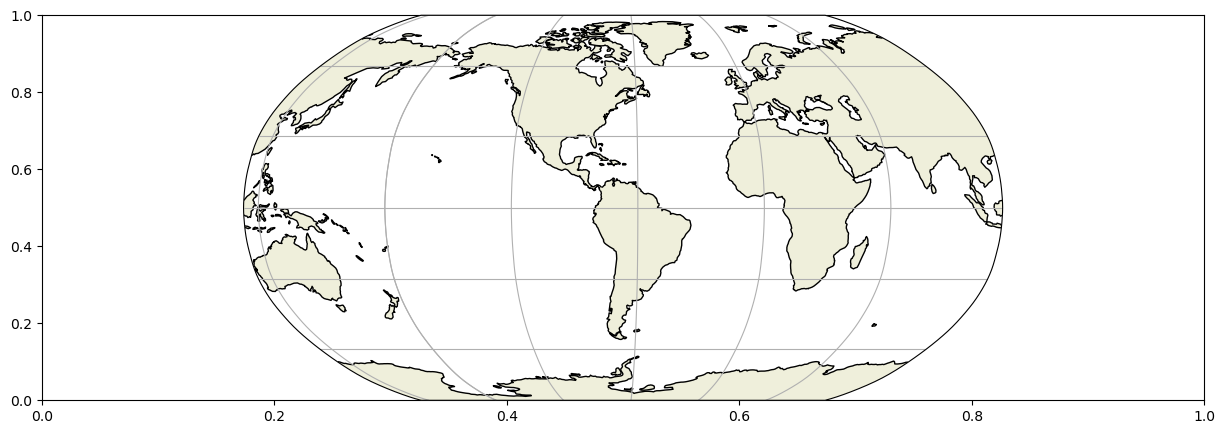

In [22]:
fig = plt.figure(figsize=(15,5))
cm = plt.get_cmap('gist_rainbow')
ax=fig.gca()

ax = plt.axes(projection=ccrs.Robinson(central_longitude=-67, globe=None))
ax.gridlines()
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)

p=ax.pcolor(diff_nosel66_weights.lon,diff_nosel66_weights.lat,diff_nosel66_weights,transform=ccrs.PlateCarree(),vmin=-2,vmax=2, cmap='jet')
h=plt.colorbar(p)

In [ ]:
fig = plt.figure(figsize=(15,5))
cm = plt.get_cmap('gist_rainbow')
ax=fig.gca()

ax = plt.axes(projection=ccrs.Robinson(central_longitude=-67, globe=None))
ax.gridlines()
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)

p=ax.pcolor(diff_sel66_weights.lon,diff_sel66_weights.lat,diff_sel66_weights,transform=ccrs.PlateCarree(),vmin=-2,vmax=2, cmap='jet')
h=plt.colorbar(p)

In [ ]:
fig = plt.figure(figsize=(15,5))
cm = plt.get_cmap('gist_rainbow')
ax=fig.gca()

ax = plt.axes(projection=ccrs.Robinson(central_longitude=-67, globe=None))
ax.gridlines()
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)

p=ax.pcolor(diff_weights_sel66.lon,diff_weights_sel66.lat,diff_weights_sel66,transform=ccrs.PlateCarree(),vmin=-2,vmax=2, cmap='jet')
h=plt.colorbar(p)

In [ ]:
fig = plt.figure(figsize=(15,5))
cm = plt.get_cmap('gist_rainbow')
ax=fig.gca()

ax = plt.axes(projection=ccrs.Robinson(central_longitude=-67, globe=None))
ax.gridlines()
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)

p=ax.pcolor(diff_coslat_sel66.lon,diff_coslat_sel66.lat,diff_coslat_sel66,transform=ccrs.PlateCarree(),vmin=-2,vmax=2, cmap='jet')
h=plt.colorbar(p)

# Differences GMSL for weights and sel 66, show global impacts of each change

In [42]:
gmsl_grids_3x1_no66sel_coslat = xr.open_dataset(str(gmsl_file_dir) + '/GMSL_grids_3x1_3errors_2cm_no66sel_coslat.nc')
gmsl_grids_3x1_no66sel_weight = xr.open_dataset(str(gmsl_file_dir) + '/GMSL_grids_3x1_3errors_2cm_no66sel_weight.nc')
gmsl_grids_3x1_66sel_coslat = xr.open_dataset(str(gmsl_file_dir) + '/GMSL_grids_3x1_3errors_2cm_66sel_coslat.nc')
gmsl_grids_3x1_66sel_weight = xr.open_dataset(str(gmsl_file_dir) + '/GMSL_grids_3x1_3errors_2cm_66sel_weight.nc')

gmsl_grids_3x1 = xr.open_dataset(str(gmsl_file_dir) + '/GMSL_grids_3x1_3errors_2cm.nc')
gmsl_grids_3x1_old = xr.open_dataset(str(gmsl_file_dir) + '/GMSL_grids_3x1_3errors_2cm_old.nc')

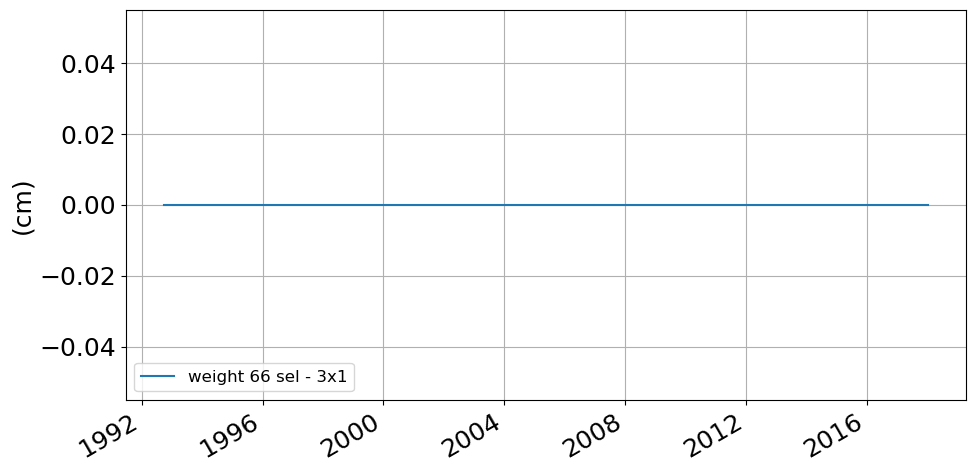

In [48]:
fig,ax=plt.subplots(figsize=(10,5))
# (gmsl_grids_3x1_no66sel_coslat.gmsl_grids_3x1*100-gmsl_grids_3x1.gmsl_grids_3x1*100).plot(label='coslat no 66 sel - 3x1');
# (gmsl_grids_3x1_66sel_coslat.gmsl_grids_3x1*100-gmsl_grids_3x1.gmsl_grids_3x1*100).plot(label='coslat 66 sel - 3x1');
# (gmsl_grids_3x1_no66sel_weight.gmsl_grids_3x1*100-gmsl_grids_3x1.gmsl_grids_3x1*100).plot(label='weight no 66 sel - 3x1');
(gmsl_grids_3x1_66sel_weight.gmsl_grids_3x1*100-gmsl_grids_3x1.gmsl_grids_3x1*100).plot(label='weight 66 sel - 3x1');
plt.grid()
plt.ylabel('(cm)',fontsize=18)
plt.xlabel('')
plt.tick_params(axis='both', which='major', labelsize=18)
plt.legend(ncol=1, loc='lower left',fontsize=12)
fig.subplots_adjust(left=0.13,top=0.93,bottom=0.15,right=0.97)
#so

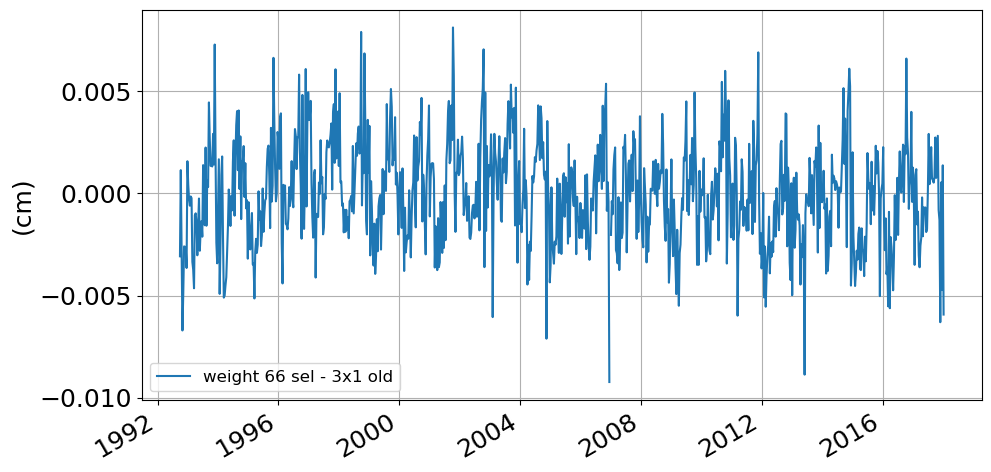

In [52]:
fig,ax=plt.subplots(figsize=(10,5))
# (gmsl_grids_3x1_no66sel_coslat.gmsl_grids_3x1*100-gmsl_grids_3x1_old.gmsl_grids_3x1*100).plot(label='coslat no 66 sel - 3x1 old');
# (gmsl_grids_3x1_66sel_coslat.gmsl_grids_3x1*100-gmsl_grids_3x1_old.gmsl_grids_3x1*100).plot(label='coslat 66 sel - 3x1 old');
# (gmsl_grids_3x1_no66sel_weight.gmsl_grids_3x1*100-gmsl_grids_3x1_old.gmsl_grids_3x1*100).plot(label='weight no 66 sel - 3x1 old');
(gmsl_grids_3x1_66sel_weight.gmsl_grids_3x1*100-gmsl_grids_3x1_old.gmsl_grids_3x1*100).plot(label='weight 66 sel - 3x1 old');
plt.grid()
plt.ylabel('(cm)',fontsize=18)
plt.xlabel('')
plt.tick_params(axis='both', which='major', labelsize=18)
plt.legend(ncol=1, loc='lower left',fontsize=12)
fig.subplots_adjust(left=0.13,top=0.93,bottom=0.15,right=0.97)

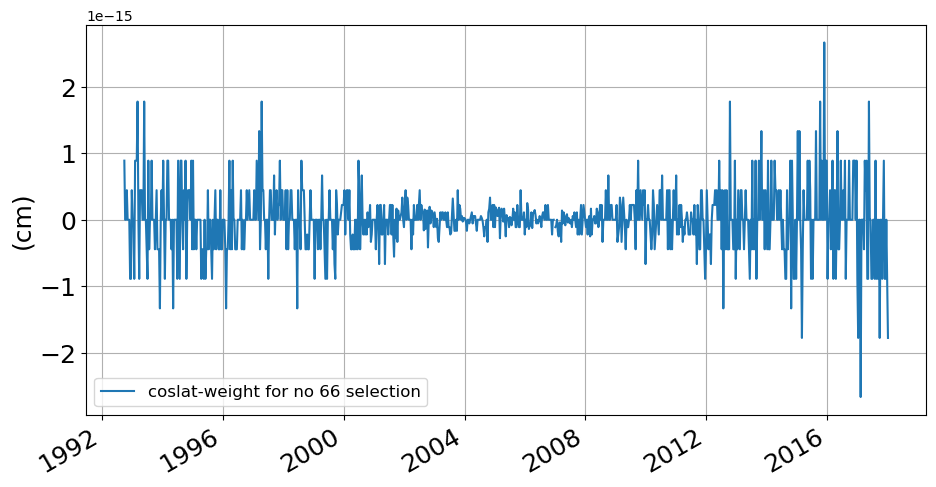

In [27]:
fig,ax=plt.subplots(figsize=(10,5))
(gmsl_grids_3x1_no66sel_coslat.gmsl_grids_3x1*100-gmsl_grids_3x1_no66sel_weight.gmsl_grids_3x1*100).plot(label='coslat-weight for no 66 selection');
plt.grid()
plt.ylabel('(cm)',fontsize=18)
plt.xlabel('')
plt.tick_params(axis='both', which='major', labelsize=18)
plt.legend(ncol=1, loc='lower left',fontsize=12)
fig.subplots_adjust(left=0.13,top=0.93,bottom=0.15,right=0.97)

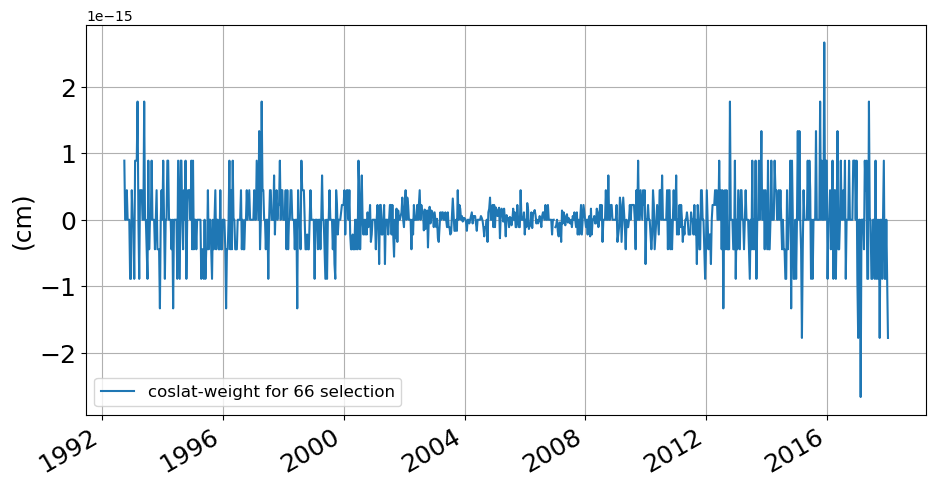

In [28]:
fig,ax=plt.subplots(figsize=(10,5))
(gmsl_grids_3x1_66sel_coslat.gmsl_grids_3x1*100-gmsl_grids_3x1_66sel_weight.gmsl_grids_3x1*100).plot(label='coslat-weight for 66 selection');
plt.grid()
plt.ylabel('(cm)',fontsize=18)
plt.xlabel('')
plt.tick_params(axis='both', which='major', labelsize=18)
plt.legend(ncol=1, loc='lower left',fontsize=12)
fig.subplots_adjust(left=0.13,top=0.93,bottom=0.15,right=0.97)

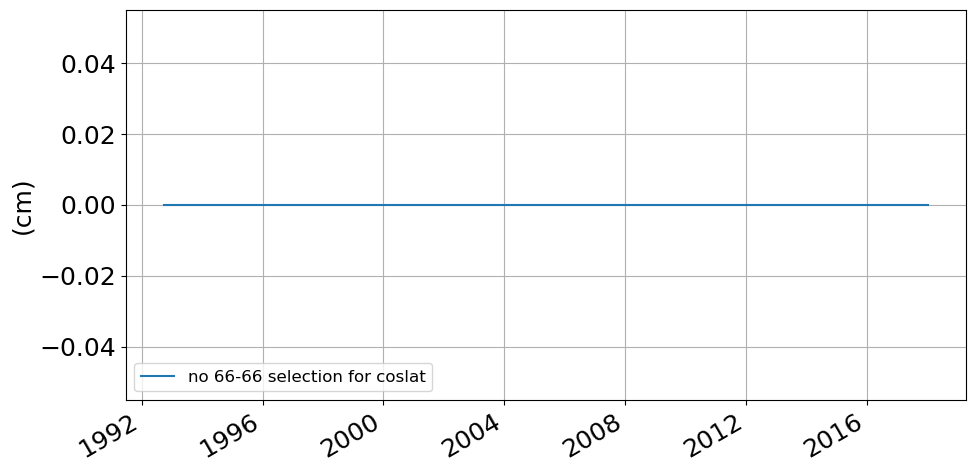

In [29]:
fig,ax=plt.subplots(figsize=(10,5))
(gmsl_grids_3x1_no66sel_coslat.gmsl_grids_3x1*100-gmsl_grids_3x1_66sel_coslat.gmsl_grids_3x1*100).plot(label='no 66-66 selection for coslat');
plt.grid()
plt.ylabel('(cm)',fontsize=18)
plt.xlabel('')
plt.tick_params(axis='both', which='major', labelsize=18)
plt.legend(ncol=1, loc='lower left',fontsize=12)
fig.subplots_adjust(left=0.13,top=0.93,bottom=0.15,right=0.97)

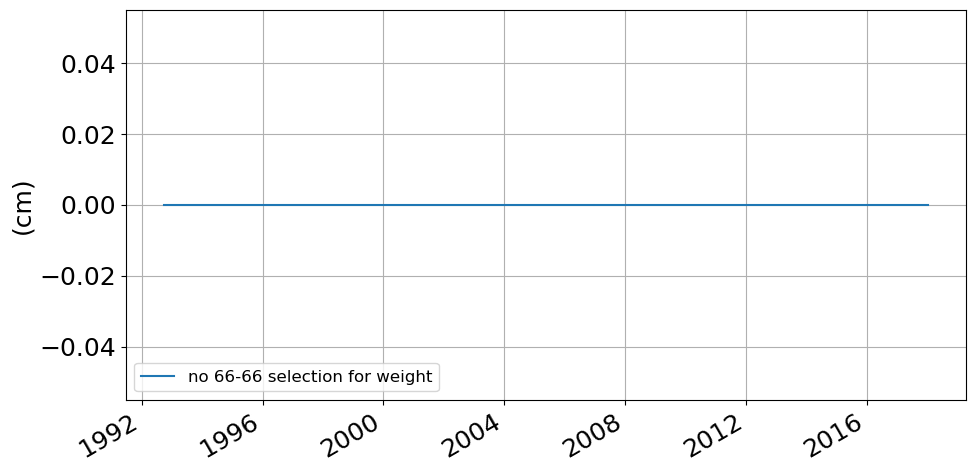

In [30]:
fig,ax=plt.subplots(figsize=(10,5))
(gmsl_grids_3x1_no66sel_weight.gmsl_grids_3x1*100-gmsl_grids_3x1_66sel_weight.gmsl_grids_3x1*100).plot(label='no 66-66 selection for weight');
plt.grid()
plt.ylabel('(cm)',fontsize=18)
plt.xlabel('')
plt.tick_params(axis='both', which='major', labelsize=18)
plt.legend(ncol=1, loc='lower left',fontsize=12)
fig.subplots_adjust(left=0.13,top=0.93,bottom=0.15,right=0.97)

# Global differences with simple gridding

In [37]:
gmsl_grids = xr.open_dataset(str(gmsl_file_dir) + '/GMSL_grids_19922017_3errors_2cm_100points.nc')

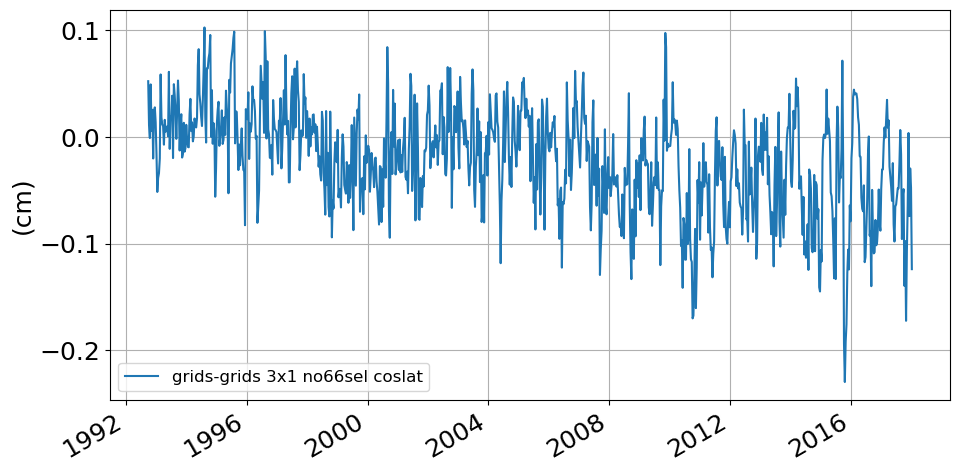

In [38]:
fig,ax=plt.subplots(figsize=(10,5))
(gmsl_grids.gmsl_grids*100-gmsl_grids_3x1_no66sel_coslat.gmsl_grids_3x1*100).plot(label='grids-grids 3x1 no66sel coslat');
plt.grid()
plt.ylabel('(cm)',fontsize=18)
plt.xlabel('')
plt.tick_params(axis='both', which='major', labelsize=18)
plt.legend(ncol=1, loc='lower left',fontsize=12)
fig.subplots_adjust(left=0.13,top=0.93,bottom=0.15,right=0.97)

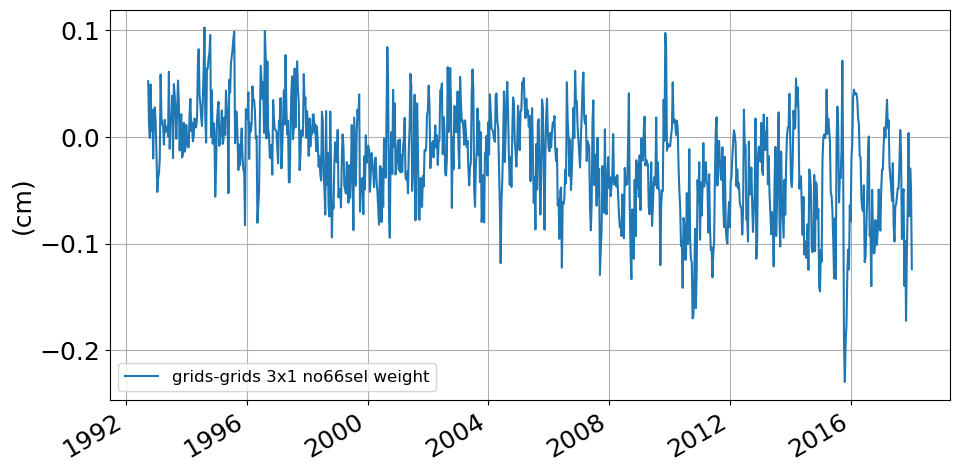

In [39]:
fig,ax=plt.subplots(figsize=(10,5))
(gmsl_grids.gmsl_grids*100-gmsl_grids_3x1_no66sel_weight.gmsl_grids_3x1*100).plot(label='grids-grids 3x1 no66sel weight');
plt.grid()
plt.ylabel('(cm)',fontsize=18)
plt.xlabel('')
plt.tick_params(axis='both', which='major', labelsize=18)
plt.legend(ncol=1, loc='lower left',fontsize=12)
fig.subplots_adjust(left=0.13,top=0.93,bottom=0.15,right=0.97)

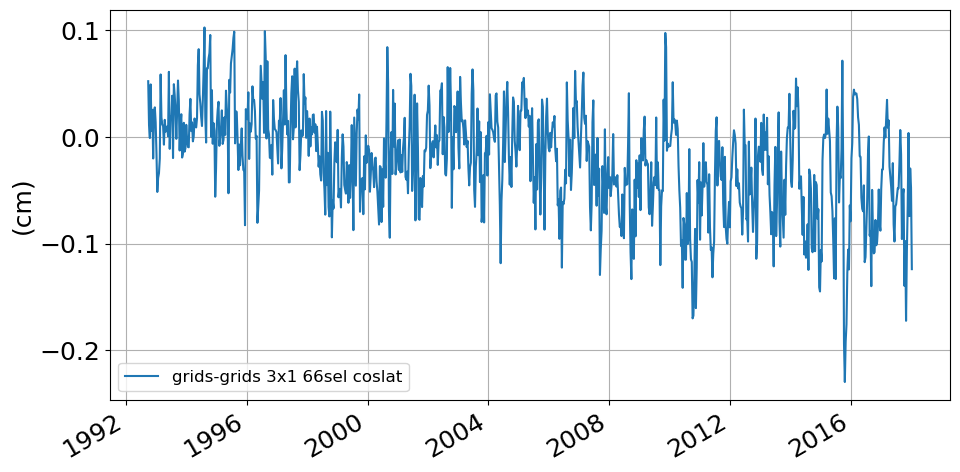

In [40]:
fig,ax=plt.subplots(figsize=(10,5))
(gmsl_grids.gmsl_grids*100-gmsl_grids_3x1_66sel_coslat.gmsl_grids_3x1*100).plot(label='grids-grids 3x1 66sel coslat');
plt.grid()
plt.ylabel('(cm)',fontsize=18)
plt.xlabel('')
plt.tick_params(axis='both', which='major', labelsize=18)
plt.legend(ncol=1, loc='lower left',fontsize=12)
fig.subplots_adjust(left=0.13,top=0.93,bottom=0.15,right=0.97)

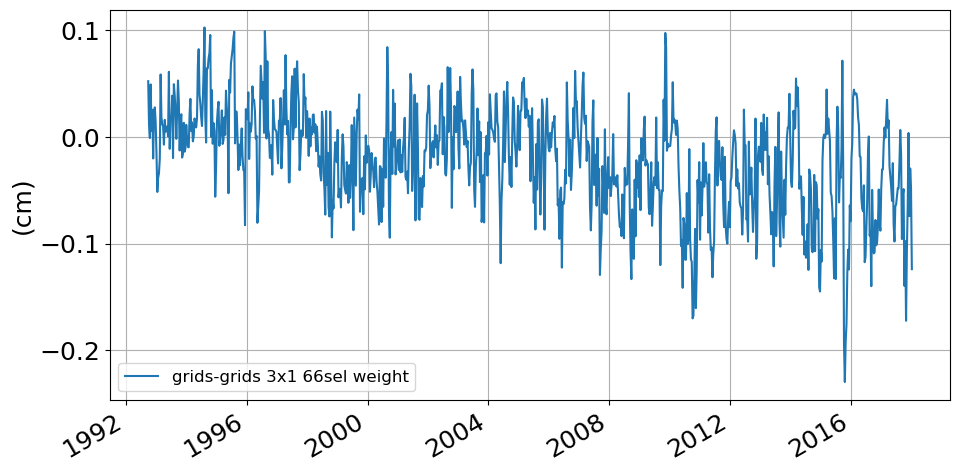

In [41]:
fig,ax=plt.subplots(figsize=(10,5))
(gmsl_grids.gmsl_grids*100-gmsl_grids_3x1_66sel_weight.gmsl_grids_3x1*100).plot(label='grids-grids 3x1 66sel weight');
plt.grid()
plt.ylabel('(cm)',fontsize=18)
plt.xlabel('')
plt.tick_params(axis='both', which='major', labelsize=18)
plt.legend(ncol=1, loc='lower left',fontsize=12)
fig.subplots_adjust(left=0.13,top=0.93,bottom=0.15,right=0.97)